<a href="https://colab.research.google.com/github/one-2730/DeepLearning/blob/DeepLearning-from-Scratch-1/DeapLearning_From_Scratch1_CH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH.2 퍼셉트론

##2.1 퍼셉트론이란?

퍼셉트론은 다수의 신호를 받아 하나의 신호(0 또는 1)를 출력
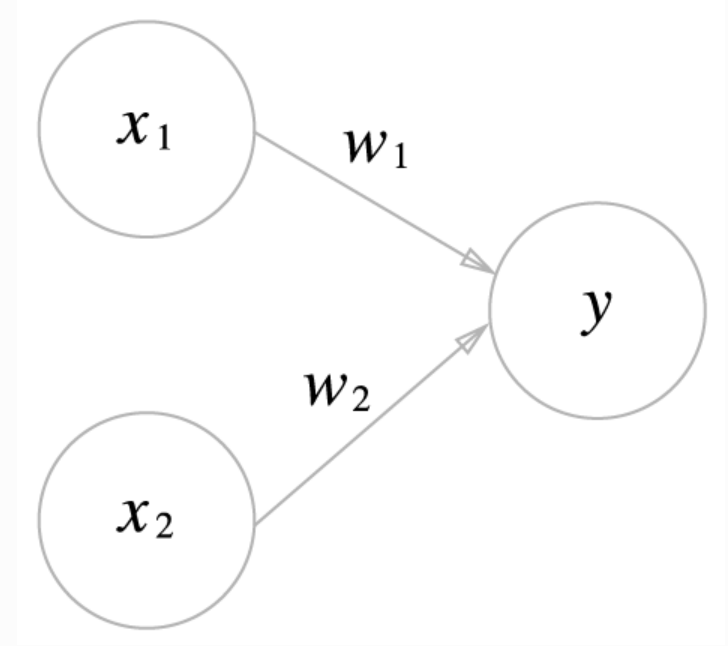


<2개의 신호를 입력 받은 퍼셉트론>

x1, x2: 입력 신호
y: 출력 신호(입력 신호의 총합이 임계값을 넘을 때 1을 출력)
w1, w2: 가중치

##2.2 단순한 논리 회로

1. AND 게이트

|x1|x2|y|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

2. NAND 게이트

|x1|x2|y|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

3. OR 게이트

|x1|x2|y|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

##2.3 퍼셉트론 구현하기

In [1]:
#AND Gate

def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [2]:
#편향 b를 추가: 임계값 theta를 편향 b로 치환, 0을 초과하면 1을 반환

import numpy as np

x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[0.  0.5]
0.5
-0.19999999999999996


In [3]:
#편향을 도입한 AND Gate

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) +b
  if tmp <= 0:
    return 0
  else:
    return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [4]:
#NAND Gate

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) +b
  if tmp <= 0:
    return 0
  else:
    return 1

print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [5]:
#OR Gate

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.4
  tmp = np.sum(w*x) +b
  if tmp <= 0:
    return 0
  else:
    return 1

print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


##2.4 퍼셉트론의 한계

XOR 게이트(배타적 논리합)을 구현할 수 없음. 퍼셉트론이 선형 방식이기 때문.

*XOR 게이트

|x1|x2|y|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

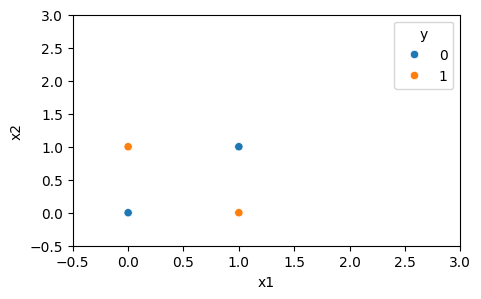

In [6]:
#XOR Gate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

XOR_df = pd.DataFrame({'x1': [0, 0, 1, 1],
                       'x2': [0, 1, 0, 1],
                       'y': [0, 1, 1, 0]})

plt.figure(figsize = (5, 3))
sns.scatterplot(x = 'x1', y = 'x2', data = XOR_df, hue = 'y')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

##2.5 다층퍼셉트론

퍼셉트론으로는 XOR 게이트를 표현할 수 없지만, 다층 퍼셉트론을 만들면 구현 가능



|x1|x2||s1|s2||y|
|--|--|--|--|--|--|--|
|0|0||1|0||0|
|0|1||1|1||1|
|1|0||1|1||1|
|1|1||0|0||0|

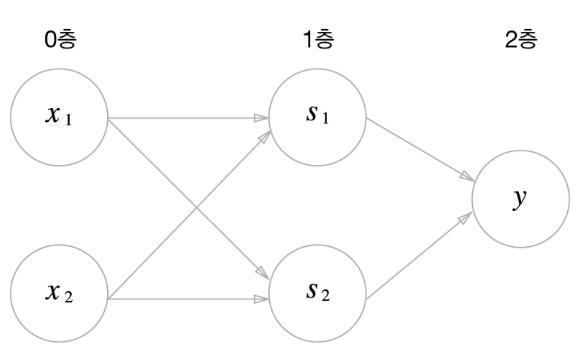



In [7]:
#XOR Gate

def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0
